<a href="https://colab.research.google.com/github/maycmesquia/Houses_Kaggle/blob/main/Houses_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contatos!

Kaggle: https://www.kaggle.com/maycondsmendes

Linkedin: https://www.linkedin.com/in/maycon-douglas-data-science/

Github: https://github.com/maycmesquia


# House Prices - Advanced Regression Techniques

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt

**Meta**

É sua função prever o preço de venda de cada casa. Para cada Id no conjunto de teste, você deve prever o valor da variável SalePrice. 

**Métrica**

Os envios são avaliados com base no erro quadrático médio (RMSE)  entre o logaritmo do valor previsto e o logaritmo do preço de venda observado. (Tirar logs significa que erros na previsão de casas caras e casas baratas afetarão o resultado igualmente.)

## Preparação de Ambiente


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit

from sklearn import metrics
from scipy.stats import pearsonr, normaltest, spearmanr

## Importando Dados

Importando as bases de dados de Treino e Teste

In [133]:
end = '/content/drive/MyDrive/Colab Notebooks/Kaggle - Competicoes/House Prices - Advanced Regression Techniques/'
train = pd.read_csv(end + 'train.csv')
test = pd.read_csv(end + 'test.csv')

train.shape, test.shape

((1460, 81), (1459, 80))

In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Iremos classificar as variaveis em Qualitativas e Quantitativas.

In [135]:
variaveis_quantitativas = []
variaveis_qualitativas = []

for coluna in train.columns:
    if train[coluna].dtype == 'int64' or train[coluna].dtype == 'float64':
        variaveis_quantitativas.append(coluna)
    else:
        variaveis_qualitativas.append(coluna)

variaveis_quantitativas.remove('SalePrice')
variaveis_quantitativas.remove('OverallQual')
variaveis_quantitativas.remove('OverallCond')
variaveis_quantitativas.remove('Id')
variaveis_qualitativas.append('OverallQual')
variaveis_qualitativas.append('OverallCond')

print(variaveis_quantitativas)
print(variaveis_qualitativas)

['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'F

## Limpeza dos Dados

Iremos substituir os valores vazios (NaN) das variaveis pelas medianas das amostras, ou pelos melhores valores

Já as variaveis Qualitativas iremos substituir pela moda da amostra.

In [136]:
for variavel in variaveis_quantitativas:
    if train[variavel].isna().sum() > 0:
        train[variavel].fillna(train[variavel].median(), inplace=True)
    if test[variavel].isna().sum() > 0:
        test[variavel].fillna(test[variavel].median(), inplace=True)

In [137]:
for variavel in variaveis_qualitativas:
    if train[variavel].isna().sum() > 0:
        train[variavel].fillna('NA', inplace=True)
    if test[variavel].isna().sum() > 0:
        test[variavel].fillna('NA', inplace=True)

In [138]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

## Verificar Correlação das variaveis

Primeiro devemos verificar se a variavel dependente SalePrice segue uma distribuição normal!, pois isso implica no teste de correlação a ser utilizado, para verificar a distribuição da variavel dependete utilizaremos o normaltest do Scipy

Ela nos devolve dois valores, um valor de estatistica do teste e um $P_{valor}$, caso o $P_{valor}$ seja inferior a significancia devemos rejeitar a hipotese nula $H_0$ de que os dados seguem uma distribuição normal.

In [139]:
significancia = 0.05
estatistica, pvalue = normaltest(train['SalePrice'])
print(f'P valor: {pvalue}')
print(f'Estatistica do teste: {estatistica}')

if pvalue < significancia:
    print("Devemos rejeitar a Hipotese Nula H0: Que os dados seguem uma distribuição normal")
else:
        print("Devemos aceitar a Hipotese Nula H0: Que os dados seguem uma distribuição normal")


P valor: 2.283848353787728e-133
Estatistica do teste: 610.8359109472653
Devemos rejeitar a Hipotese Nula H0: Que os dados seguem uma distribuição normal


Podemos verificar a seguir, no histograma da varivel dependente, que sua distribuição não tem o formato de sino, e que sua média e mediana não tendem a ser igual.

Valor de média: 180921.2, Valor de mediana: 163000.0


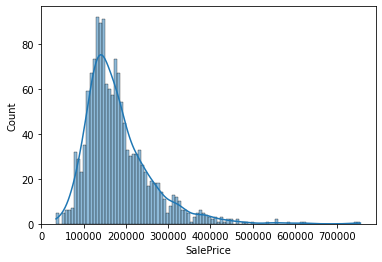

In [140]:
media = round(train['SalePrice'].mean(),2)
mediana = train['SalePrice'].median()
print(f'Valor de média: {media}, Valor de mediana: {mediana}')
sns.histplot(data=train, x='SalePrice', kde=True, bins=100)

Como a variavel dependente não segue uma distribuição normal iremos utilizar o teste de correlação de Spearman, este teste tem os seguintes pressupostos:

- Uma ou mais variaveis não apresentar distribuição Normal,
- Uma das variaveis pode ou não ser Qualitativas Ordinais.

Ele nos devolve dois valores, um fator de correlação e um $P_{valor}$, tendo como hipotese nula $H_0$: Os conjuntos de dados não são correlacionados.

Caso o $P_{valor}$ seja inferior a significancia (0.05) Devemos rejeitar a $H_0$, e aceitar que os dados tem correlação.

Ainda referente ao teste de Spearman, caso rejeitemos a hipotese nula, mas o fator de correlação seja igual ou inferior a 0.3, o que sugere uma correlação direta, ou seja: se a variavel analisada aumenta a variavel dependente tambem aumenta, ou o fator de correlação for igual ou superior a -0.3, ou seja uma correlação inversa, se a variavel analisada aumenta a variavel dependente diminui, iremos despresar a variavel analisada, pois a correlação entre ela e a varivel dependente será conciderada fraca!, conforme resumo abaixo:

|Fator de Correlação: r | Situação|
|---|---|
|r = 0|Correlação Inexistente|
|0 > r <= +/-0.3| Correlação Fraca|
|+/-0.3 > r <= +/-0.6| Correlação Moderada|
|+/-0.6 > r <= +/-0.9| Correlação Forte|
| +/-0.9 > r <= +/-1.0| Correlação Muito Forte|


In [141]:
significancia = 0.05
quant_excluir = []
quant_manter = []
for variavel in variaveis_quantitativas:
    coef_spearman, p_spearman = spearmanr(train['SalePrice'], train[variavel], nan_policy='omit')
    print(f'{variavel:15} : coeficiente: {coef_spearman:0.3f}, Pvalor: {p_spearman: 0.3f} ')
    if p_spearman > significancia:
        print(f'                  *Excluir variavel: Pvalor superior a significancia {significancia}')
        quant_excluir.append(variavel)
    elif -0.3 < coef_spearman < 0.3:
        print(f'                  *Excluir variavel: correlação fraca.')
        quant_excluir.append(variavel)
    else:
        print(f'                  -Manter Variavel')
        quant_manter.append(variavel)

print(len(quant_manter))

MSSubClass      : coeficiente: 0.007, Pvalor:  0.784 
                  *Excluir variavel: Pvalor superior a significancia 0.05
LotFrontage     : coeficiente: 0.376, Pvalor:  0.000 
                  -Manter Variavel
LotArea         : coeficiente: 0.456, Pvalor:  0.000 
                  -Manter Variavel
YearBuilt       : coeficiente: 0.653, Pvalor:  0.000 
                  -Manter Variavel
YearRemodAdd    : coeficiente: 0.571, Pvalor:  0.000 
                  -Manter Variavel
MasVnrArea      : coeficiente: 0.416, Pvalor:  0.000 
                  -Manter Variavel
BsmtFinSF1      : coeficiente: 0.302, Pvalor:  0.000 
                  -Manter Variavel
BsmtFinSF2      : coeficiente: -0.039, Pvalor:  0.138 
                  *Excluir variavel: Pvalor superior a significancia 0.05
BsmtUnfSF       : coeficiente: 0.185, Pvalor:  0.000 
                  *Excluir variavel: correlação fraca.
TotalBsmtSF     : coeficiente: 0.603, Pvalor:  0.000 
                  -Manter Variavel
1stFlrSF   

In [142]:
significancia = 0.05
qual_excluir = []
qual_manter = []
for variavel in variaveis_qualitativas:
    coef_spearman, p_spearman = spearmanr(train['SalePrice'], train[variavel], nan_policy='omit')
    print(f'{variavel:15} : coeficiente: {coef_spearman:0.3f}, Pvalor: {p_spearman: 0.3f} ')
    if p_spearman > significancia:
        print(f'                  *Excluir variavel: Pvalor superior a significancia {significancia}')
        qual_excluir.append(variavel)
    elif -0.3 < coef_spearman < 0.3:
        print(f'                  *Excluir variavel: correlação correlação fraca.')
        qual_excluir.append(variavel)
    else:
        print(f'                  -Manter Variavel')
        qual_manter.append(variavel)

print(len(qual_manter))

MSZoning        : coeficiente: -0.335, Pvalor:  0.000 
                  -Manter Variavel
Street          : coeficiente: 0.046, Pvalor:  0.080 
                  *Excluir variavel: Pvalor superior a significancia 0.05
Alley           : coeficiente: 0.136, Pvalor:  0.000 
                  *Excluir variavel: correlação correlação fraca.
LotShape        : coeficiente: -0.306, Pvalor:  0.000 
                  -Manter Variavel
LandContour     : coeficiente: -0.010, Pvalor:  0.696 
                  *Excluir variavel: Pvalor superior a significancia 0.05
Utilities       : coeficiente: -0.017, Pvalor:  0.523 
                  *Excluir variavel: Pvalor superior a significancia 0.05
LotConfig       : coeficiente: -0.074, Pvalor:  0.005 
                  *Excluir variavel: correlação correlação fraca.
LandSlope       : coeficiente: 0.050, Pvalor:  0.055 
                  *Excluir variavel: Pvalor superior a significancia 0.05
Neighborhood    : coeficiente: 0.166, Pvalor:  0.000 
           

In [143]:
train = train.drop(qual_excluir, axis=1)
train = train.drop(quant_excluir, axis=1)
test = test.drop(qual_excluir, axis=1)
test = test.drop(quant_excluir, axis=1)

train.shape, test.shape

((1460, 34), (1459, 33))

## Considerando as variaveis Categoricas, Qualitativas

In [144]:
for variavel in qual_manter:
    print(variavel)
    print(train[variavel].unique())
    tipo1 = ['NA']
    media = [0]
    mapa = {}
    for tipo in train[variavel].unique():
        tipo1.append(tipo)
        media.append(round(train[train[variavel]==tipo]['SalePrice'].mean(),0))
    
    for i in range(len(tipo1)):
        maior = max(media)
        idx = media.index(maior)
        tp = tipo1.pop(idx)
        valor = media.pop(idx)
        mapa[tp] = len(tipo1)
    print(mapa)

    train[variavel] = train[variavel].map(mapa)
    test[variavel] = test[variavel].map(mapa)

    print(train[variavel].unique())
    print(test[variavel].unique())


MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
{'FV': 5, 'RL': 4, 'RH': 3, 'RM': 2, 'C (all)': 1, 'NA': 0}
[4 2 1 5 3]
[3 4 2 5 1 0]
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
{'IR2': 4, 'IR3': 3, 'IR1': 2, 'Reg': 1, 'NA': 0}
[1 2 4 3]
[1 2 4 3]
ExterQual
['Gd' 'TA' 'Ex' 'Fa']
{'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0}
[3 2 4 1]
[2 3 4 1]
Foundation
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
{'PConc': 6, 'Wood': 5, 'Stone': 4, 'CBlock': 3, 'BrkTil': 2, 'Slab': 1, 'NA': 0}
[6 3 2 5 1 4]
[3 6 2 4 1 5]
BsmtQual
['Gd' 'TA' 'Ex' 'NA' 'Fa']
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'NA': 0}
[4 3 5 0 2]
[3 4 5 2 0]
HeatingQC
['Ex' 'Gd' 'TA' 'Fa' 'Po']
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
[5 4 3 2 1]
[3 4 5 2 1]
CentralAir
['Y' 'N']
{'Y': 2, 'N': 1, 'NA': 0}
[2 1]
[2 1]
KitchenQual
['Gd' 'TA' 'Ex' 'Fa']
{'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0}
[3 2 4 1]
[2 3 4 1 0]
GarageType
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'NA' 'Basment' '2Types']
{'BuiltIn': 7, 'Attchd': 6, 'Basment': 5,

## Observando Outliers

Vamos obeservar os valores dos Outliers das variaveis quantitativas, poela ordem de grandeza dos coeficientes de correlação

As variaveis que tenham um coeficiente maior ou igual a 0.6 iremos printar o grafico da variavel x SalePrice, e vamos ver quais pontos cujo o valor esta descorrelacionado aos demais do conjunto.

In [145]:
quant_manter

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

YearBuilt  : 0.6526815462850586


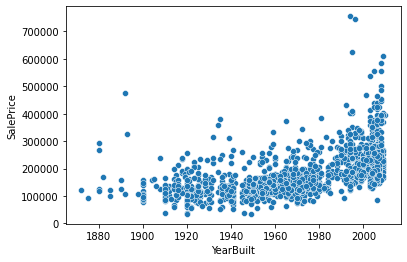

TotalBsmtSF  : 0.6027254448924096


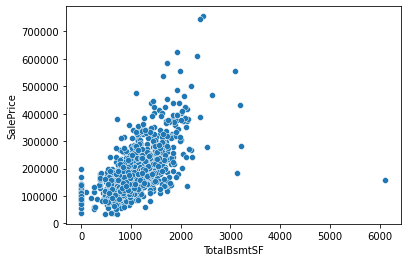

GrLivArea  : 0.7313095834659141


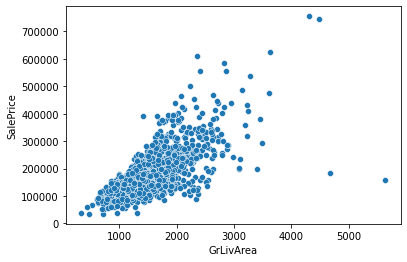

FullBath  : 0.6359570562496957


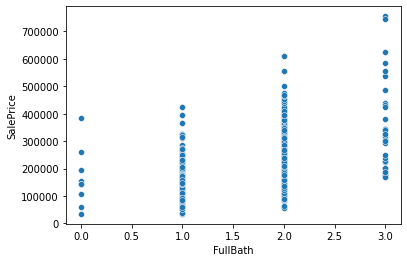

GarageCars  : 0.6907109670497434


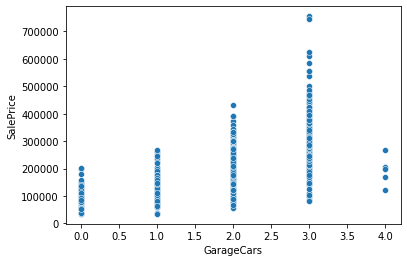

GarageArea  : 0.6493785338868229


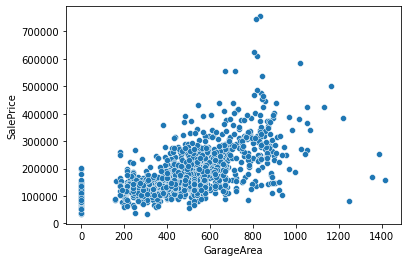

In [146]:
for variavel in quant_manter:
    coef, p_valor = spearmanr(train['SalePrice'], train[variavel])
    if coef > 0.6:
        print(variavel,' :',coef)
        sns.scatterplot(data=train, y='SalePrice', x=variavel)
        plt.show()

In [147]:
train.drop(train[(train['GrLivArea']>4000)].index, inplace=True)  # Retiramos 4
train.drop(train[(train['GarageCars']>3) & (train['SalePrice']<300000)].index, inplace=True)    # Retiramos 5
train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<300000)].index, inplace=True) # Retiramos 2
train.drop(train[(train['GarageArea']>750) & (train['SalePrice']>700000)].index, inplace=True)  # Retiramos 2
train.drop(train[(train['1stFlrSF']>2000) & (train['SalePrice']>700000)].index, inplace=True)   # Retiramos 2

ExterQual  : 0.6837444982863778


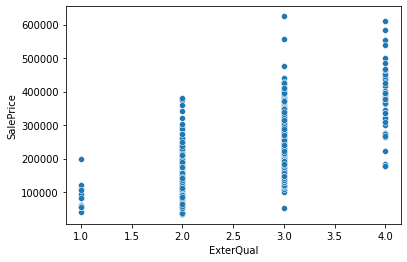

BsmtQual  : 0.6789489647237047


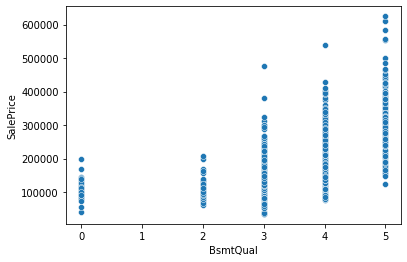

KitchenQual  : 0.6729500367168778


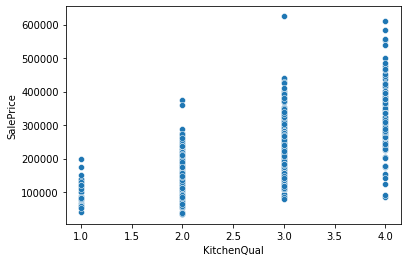

GarageType  : 0.6010818808682448


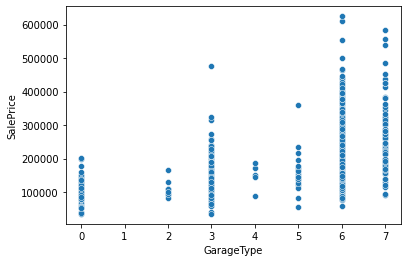

GarageFinish  : 0.636652771681781


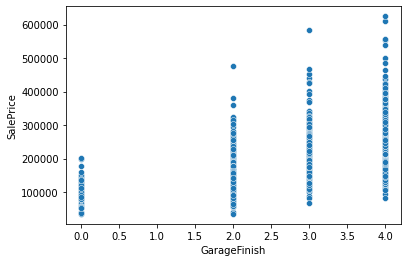

OverallQual  : 0.810899473078386


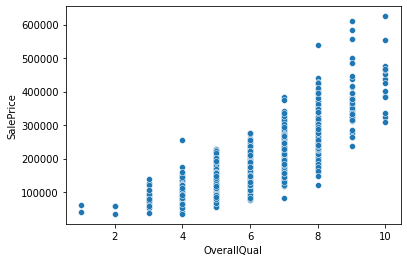

In [148]:
for variavel in qual_manter:
    coef, p_valor = spearmanr(train['SalePrice'], train[variavel])
    if coef > 0.6:
        print(variavel,' :',coef)
        sns.scatterplot(data=train, y='SalePrice', x=variavel)
        plt.show()

In [149]:
train.drop(train[(train['GarageType']==4)].index, inplace=True)  # Retiramos 5

In [150]:
train.columns

Index(['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [151]:
test.columns

Index(['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'SaleCondition'],
      dtype='object')

## Normalização dos valores

Ao normalizar os dados de treino, garantimos que todas as variaveis tenham o mesmo espaço amostral, com isso podemos ver atraves do coeficiente de cada variavel quais são as mais impostantes!

In [152]:
remover = ['SalePrice', 'Id']
y_train = train['SalePrice']
X_test = test.drop('Id',axis=1)
X = train.drop(remover, axis=1)

mms = MinMaxScaler()

X_train = mms.fit_transform(X)
X_test = mms.transform(X_test)

estimador = LinearRegression()

modelo = estimador.fit(X_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficientes angulares:", modelo.coef_)

Intercepto: -73645.19591854335
Coeficientes angulares: [ 12653.07661299  31855.83066672 114366.9190906   10030.89914737
 110573.63137441  13277.52348871   6468.83188019  46359.87328038
  42069.64288236   2373.55248814  11060.27466586  49635.14701018
  45570.27442651   6322.21305361   -344.74229425  20786.1351675
 147757.62087871 -18185.4262108    1167.39245861  33040.59187398
   9170.92283034  11917.39093473  -4883.58835205  -9745.23307853
   5064.39767819   9381.94114812  43265.59899413 -10576.75546167
 -12074.54375156  15583.80659146  13447.06772975  32353.21303282]


A partir dos valores dos coeficientes podemos perceber quais variaveis interferem mais no valor da resultante **"SalePrice"**

Atraves do DataFrame a seguir podemos notar que os coeficientes variam de -18993.638 a 147684.734 com isso iremos desconciderar as variaveis cujo o coeficiente esta entre -10 mil a 10 mil

Com isso ficaram as seguintes variaveis:
FullBath, GarageCond, 

TotRmsAbvGrd, YearBuilt, Fireplaces, OpenPorchSF, MSZoning, WoodDeckSF, BsmtQual, 1stFlrSF, SaleCondition, LotFrontage, KitchenQual, ExterQual, TotalBsmtSF, GarageArea, MasVnrArea, BsmtFinSF1, OverallQual, LotArea, GrLivArea.

In [153]:
df_coeficientes = pd.DataFrame(modelo.coef_, X.columns, columns=['Coeficiente'])

df_coeficientes.sort_values('Coeficiente')

,Coeficiente
FullBath,-18185.426211
GarageCond,-12074.543752
GarageQual,-10576.755462
GarageYrBlt,-9745.233079
GarageType,-4883.588352
CentralAir,-344.742294
HalfBath,1167.392459
Foundation,2373.552488
GarageFinish,5064.397678
HeatingQC,6322.213054


In [154]:
variaveis = ['FullBath', 'GarageCond', 'TotRmsAbvGrd', 'YearBuilt', 'Fireplaces', 
             'OpenPorchSF', 'MSZoning', 'WoodDeckSF', 'BsmtQual', '1stFlrSF', 'SaleCondition', 
             'LotFrontage', 'KitchenQual', 'ExterQual', 'TotalBsmtSF', 'GarageArea', 'MasVnrArea', 
             'BsmtFinSF1', 'OverallQual', 'LotArea', 'GrLivArea']

## Criando e testando modelos

In [155]:
y_train = train['SalePrice']
X_test = test[variaveis]
X_train = train[variaveis]

RMSE: 30883.574, Média do Erro: 2112.371
RMSE: 31825.132, Média do Erro: 736.125
RMSE: 24867.08, Média do Erro: -1776.202
RMSE: 31185.381, Média do Erro: 3076.482
RMSE: 27686.034, Média do Erro: -1718.589
RMSE: 27407.572, Média do Erro: -259.131
RMSE: 26203.872, Média do Erro: 1352.409
RMSE: 29767.725, Média do Erro: -675.959
RMSE: 30498.402, Média do Erro: -1583.273
RMSE: 31265.166, Média do Erro: 1704.319
RMSE: 29357.958, Média do Erro: -191.794
RMSE: 30132.636, Média do Erro: -712.197
RMSE: 29485.382, Média do Erro: -1603.844
RMSE: 28154.57, Média do Erro: 298.475
RMSE: 26127.24, Média do Erro: 1520.751
RMSE: 29918.924, Média do Erro: 1094.232
RMSE: 29573.316, Média do Erro: 652.205
RMSE: 29036.716, Média do Erro: -362.959
RMSE: 32488.001, Média do Erro: 4410.247
RMSE: 26681.137, Média do Erro: 3520.204
RMSE: 29069.852, Média do Erro: 265.585
RMSE: 25749.219, Média do Erro: -646.25
RMSE: 27627.504, Média do Erro: 577.208
RMSE: 26824.909, Média do Erro: -1502.969
RMSE: 23675.219, Méd

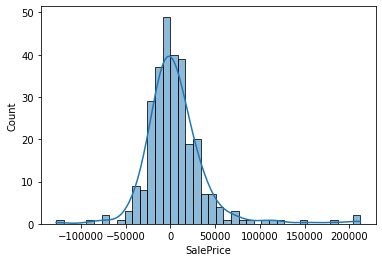


***********************************

RMSE: 35847.114


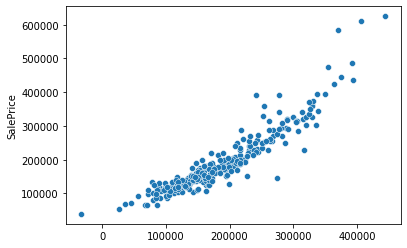

R^2: 0.8441439859266062
MAE: 22243.136577896337
MSE: 1285015570.2937825
RMSE: 35847.11383492097
Intercepto: -401651.24877681036
Coeficientes angulares: [-5.45428883e+03 -2.24223213e+03  6.73077236e+02  1.37672786e+02
  3.83749751e+03  3.08833379e+01  2.80246994e+03  2.79081957e+01
  3.72704340e+03  6.06016058e+00  6.21299168e+03  8.59853069e+01
  1.34207228e+04  1.34149207e+04  1.47896736e+01  4.30756040e+01
  2.27439143e+01  1.88805382e+01  1.12666585e+04  7.03820747e-01
  4.33340070e+01]


In [156]:
erro_lista = []
rmse_lista = []
rs = ShuffleSplit(n_splits=50, test_size=.20)


for treino_idx, valid_idx in rs.split(X_train):
    X_treino, X_valid = X_train.iloc[treino_idx], X_train.iloc[valid_idx]
    y_treino, y_valid = y_train.iloc[treino_idx], y_train.iloc[valid_idx]

    modelo = LinearRegression()
    modelo.fit(X_treino, y_treino)

    y_previsao = modelo.predict(X_valid)

    erro = round(np.mean(y_valid - y_previsao),3)
    erro_lista.append(erro)
    rmse = round(np.sqrt(metrics.mean_squared_error(y_valid, y_previsao)),3)
    rmse_lista.append(rmse)
    print(f'RMSE: {rmse}, Média do Erro: {erro}')

print('\n***********************************\n')

print('RMSE geral: ',np.mean(rmse_lista))
print('Erro geral: ',np.mean(erro_lista))

print('\n***********************************\n')
# Modelo Geral para consolidação das metricas

X_treino, X_valid, y_treino, y_valid = train_test_split(X_train, y_train, test_size=0.2)

modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

y_previsao = modelo.predict(X_valid)

erro = round(np.mean(y_valid - y_previsao),3)
rmse = round(np.sqrt(metrics.mean_squared_error(y_valid, y_previsao)),3)

print(f'\n Média do erro: {erro} \n')

sns.histplot(y_valid-y_previsao, kde=True)
plt.show()

print('\n***********************************\n')

print(f'RMSE: {rmse}')

sns.scatterplot(x=y_previsao, y=y_valid)
plt.show()

print('R^2:', metrics.r2_score(y_valid, y_previsao))
print('MAE:', metrics.mean_absolute_error(y_valid, y_previsao))
print('MSE:', metrics.mean_squared_error(y_valid, y_previsao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_previsao)))

print("Intercepto:", modelo.intercept_)
print("Coeficientes angulares:", modelo.coef_)



## Realizando Submissão de Modelo

In [157]:
X_train.shape, y_train.shape, X_test.shape

((1444, 21), (1444,), (1459, 21))

In [158]:
X_train.columns

Index(['FullBath', 'GarageCond', 'TotRmsAbvGrd', 'YearBuilt', 'Fireplaces',
       'OpenPorchSF', 'MSZoning', 'WoodDeckSF', 'BsmtQual', '1stFlrSF',
       'SaleCondition', 'LotFrontage', 'KitchenQual', 'ExterQual',
       'TotalBsmtSF', 'GarageArea', 'MasVnrArea', 'BsmtFinSF1', 'OverallQual',
       'LotArea', 'GrLivArea'],
      dtype='object')

In [159]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_previsao = modelo.predict(X_test)

In [161]:
df_sub = pd.Series(y_previsao, index=test['Id'], name='SalePrice')

arquivo = '/content/drive/Othercomputers/Meu laptop/Competicoes Kaggle/'

df_sub.to_csv(arquivo + 'Submissao_Final_Houses', header=True)